**Zadanie**

Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów (LinearAlgebra.dot) i mnożenia macierzy kwadratowej przez wektor z użyciem operatora *.
* Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów. Dokonać 10 pomiarów dla każdego rozmiaru wektora.
* Czasy działania powinny być zapisywane do jednego pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
* Wczytać dane z w/w pliku do jednego DataFrame w języku Julia.
* Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego.
* Proszę poukładac wykresy w tabelkę za pomocą opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.
* Należy zadbać o staranne podpisanie osi i wykresów.


Tworzymy funkcje zwracające czas trwania operacji:

In [1]:
function matrix_multiplication_time(n)
    @elapsed rand(n, n) * rand(n, 1)
end

using LinearAlgebra

function scalar_multiplication_time(n)
    @elapsed dot(rand(n), rand(n))
end

scalar_multiplication_time (generic function with 1 method)

Dla kolejnych rozmiarów tablicy (zakres 1-10000, krok co 100) mierzymy czasy i zapisujemy je do dataframe'a. Następnie dataframe zapisujemy do pliku w formacie CSV. Do dataframe'a zapisujemy w formacie *long*.

In [2]:
using DataFrames, CSV

dataframe = DataFrame(Size=1, Scalar=scalar_multiplication_time(1), Matrix=matrix_multiplication_time(1))
delete!(dataframe, 1)

for n = 10:100:10000
    for i = 1:10
        push!(dataframe, [n, scalar_multiplication_time(n), matrix_multiplication_time(n)])
    end
end

CSV.write("data.csv", dataframe)

"data.csv"

In [3]:
dataframe  # dataframe = CSV.read("data.csv", delim=",", DataFrame)

,Size,Scalar,Matrix
,Int64,Float64,Float64
1,10,2.0e-6,3.5e-6
2,10,1.9e-6,3.3e-6
3,10,2.0e-7,8.0e-7
4,10,3.0e-7,4.0e-7
5,10,2.0e-7,4.0e-7
6,10,2.0e-7,3.0e-7
7,10,2.0e-7,4.0e-7
8,10,2.0e-7,4.0e-7
9,10,1.0e-7,4.0e-7


Grupujemy dane wg rozmiarów tablic (10 pomiarów dla każdego rozmiaru):

In [4]:
grouped_data = groupby(dataframe, :Size)

,Size,Scalar,Matrix
,Int64,Float64,Float64
1,10,2.0e-6,3.5e-6
2,10,1.9e-6,3.3e-6
3,10,2.0e-7,8.0e-7
4,10,3.0e-7,4.0e-7
5,10,2.0e-7,4.0e-7
6,10,2.0e-7,3.0e-7
7,10,2.0e-7,4.0e-7
8,10,2.0e-7,4.0e-7
9,10,1.0e-7,4.0e-7


Dla każdej z grup zapisujemy średnią czasu wykonania danej operacji:

In [5]:
using Statistics

means = combine(grouped_data, "Scalar" => mean, "Matrix" => mean)

,Size,Scalar_mean,Matrix_mean
,Int64,Float64,Float64
1,10,5.5e-7,1.03e-6
2,110,3.8e-7,1.798e-5
3,210,5.3e-7,8.304e-5
4,310,1.07e-6,0.00019794
5,410,1.35e-6,0.00026918
6,510,1.41e-6,0.00131963
7,610,1.79e-6,0.00063448
8,710,1.49e-6,0.00120546
9,810,2.47e-6,0.00181935


Analogicznie liczymym odchylenie standardowe:

In [6]:
std_deviations = combine(grouped_data, "Scalar" => std, "Matrix" => std)

,Size,Scalar_std,Matrix_std
,Int64,Float64,Float64
1,10,7.39745e-7,1.25702e-6
2,110,9.18937e-8,6.56993e-6
3,210,1.56702e-7,1.46733e-5
4,310,4.90011e-7,5.30392e-6
5,410,6.78642e-7,5.52304e-6
6,510,2.02485e-7,0.00284945
7,610,7.69488e-7,3.64885e-5
8,710,1.66333e-7,0.00138983
9,810,8.32733e-7,0.000744448


Następnie nasze dane uśrednione przedstawiamy na wykresach:

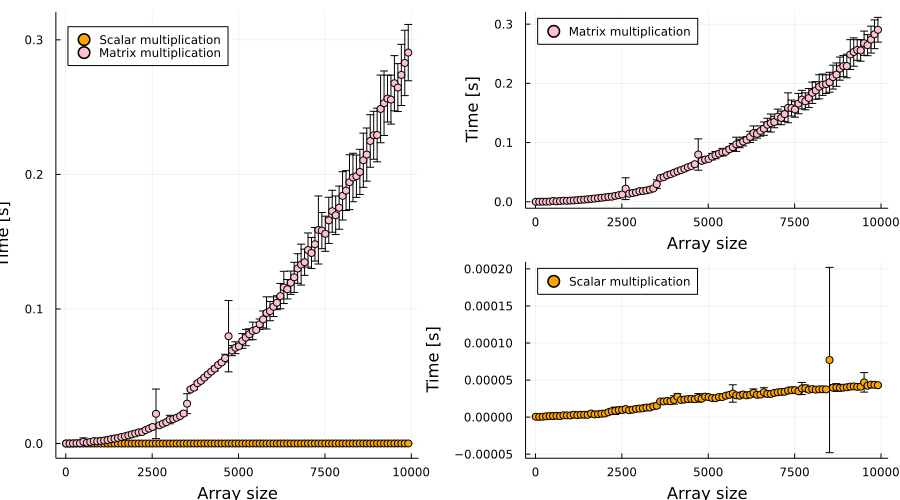

In [91]:
using Plots
# Pkg.add("PlotThemes")

theme(:default)

layOut = @layout [
    c{0.5w} grid(2, 1)
]

scatter(means.Size, [means.Scalar_mean means.Matrix_mean [means.Scalar_mean means.Matrix_mean]], 
    yerror=[std_deviations.Scalar_std std_deviations.Matrix_std], 
    label = ["Scalar multiplication" "Matrix multiplication"], legend=:topleft, 
    xlabel = "Array size", ylabel = "Time [s]", layout = layOut, color=[:orange :pink], size = (900, 500))